<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_005_paired_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction to Paired T-Tests**

#### **What Are Paired T-Tests?**
A **paired t-test**, also known as a **dependent t-test**, is a statistical method used to compare the means of two related groups. Unlike two-sample t-tests, which compare independent groups, paired t-tests evaluate differences between two measurements taken on the same group or individual under different conditions, at different times, or in matched pairs.

---

#### **Why Are Paired T-Tests Valuable?**
1. **Focus on Within-Group Changes**:
   - By comparing paired observations, a paired t-test eliminates between-group variability, increasing the test's sensitivity to detect meaningful differences.
   - Example: Measuring blood pressure before and after a treatment for the same individuals.

2. **Controls for Confounding Variables**:
   - Since the same group or individual is measured twice, the variability due to individual differences is reduced, focusing solely on the effect of the condition or treatment.

3. **Statistical Power**:
   - Paired t-tests are more powerful than independent t-tests when analyzing related groups, as they account for the natural pairing in the data.

---

#### **When Should Paired T-Tests Be Used?**
1. **Related Observations**:
   - When measurements are taken on the same individuals, groups, or matched pairs.
   - Example: Testing scores of students before and after a new teaching method.

2. **Continuous Data**:
   - The data being compared should be continuous (e.g., height, weight, scores).

3. **Assumptions Are Met**:
   - Differences between paired measurements should follow a normal distribution.
   - The test is robust to minor violations of normality with larger sample sizes.

---

#### **Real-Life Examples of Usage**
1. **Healthcare**:
   - Comparing blood pressure or glucose levels before and after administering medication in the same patients.

2. **Education**:
   - Analyzing test scores of students before and after an intervention (e.g., online tutoring).

3. **Marketing**:
   - Measuring sales performance before and after implementing a new advertising strategy for the same store locations.

4. **Product Testing**:
   - Evaluating the weight or durability of a product before and after a manufacturing process change.

5. **Environmental Science**:
   - Measuring pollution levels in the same area before and after implementing a control measure.

---

This notebook will demonstrate how to perform paired t-tests using the **Iris dataset** by simulating "before and after" conditions. It will include detailed steps for setting up hypotheses, running the test, and interpreting results, supported by visualizations to enhance understanding.



### Load Iris Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Question**  
Did the petal lengths of flowers increase after a simulated treatment?

---

### **Paired T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal length before treatment is equal to the average petal length after treatment.  
- **Alternative Hypothesis (\(H_1\))**: The average petal length before treatment is not equal to the average petal length after treatment.  

---

### **Analysis and Interpretation**  
- The KDE plot shows the distribution of petal lengths before and after the treatment. After the treatment, the distribution shifts significantly toward higher values, suggesting an increase in petal lengths.  
- The t-statistic of \(-102.90\) reflects an extremely large difference between the means of the two related groups, relative to the variability in their differences.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Real-World Use Case**  
This paired t-test simulates a **before-and-after scenario**, such as evaluating the effectiveness of an intervention. For example:
- **Before and After a Diet**: Comparing weights before starting a diet to weights after completion.  
- **Pre- and Post-Treatment**: Assessing a drug's effect on blood pressure or cholesterol levels.  

The paired t-test is ideal for testing whether such interventions produce statistically significant changes.  



Paired T-Test:
T-Statistic: -102.90
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The petal lengths significantly increased after the treatment.




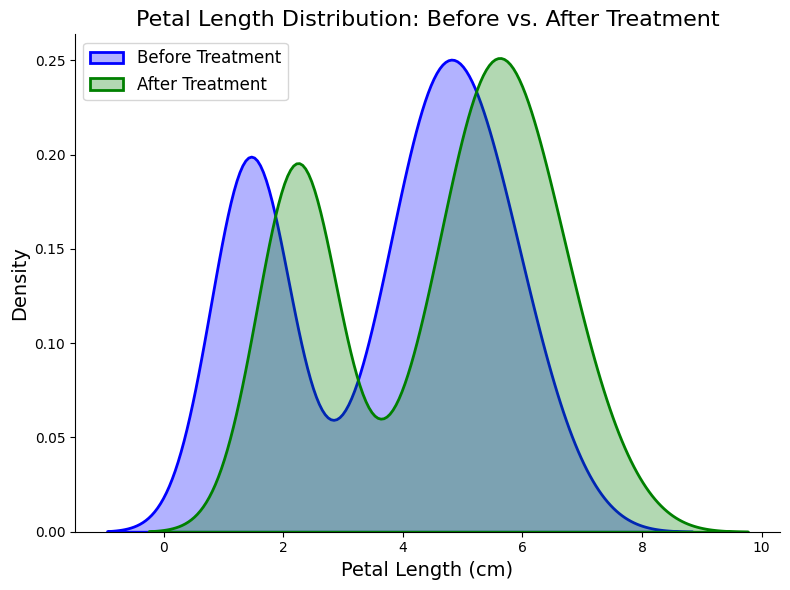

In [ ]:
from scipy.stats import ttest_rel
import numpy as np

# Set Seaborn theme, style, and palette
theme_style = "ticks"
context_scale = "notebook"

# Simulate "before treatment" and "after treatment" data
np.random.seed(42)
before_treatment = iris_df['petal length (cm)']
after_treatment = before_treatment + np.random.normal(0.8, 0.1, size=len(before_treatment))  # Adding noise

# Perform a paired t-test
t_stat, p_value = ttest_rel(before_treatment, after_treatment)

# Output results
print("Paired T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The petal lengths significantly increased after the treatment.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in petal lengths before and after treatment.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))

# Plot before vs. after treatment
sns.kdeplot(before_treatment, fill=True, alpha=0.3, linewidth=2, label="Before Treatment", color="blue")
sns.kdeplot(after_treatment, fill=True, alpha=0.3, linewidth=2, label="After Treatment", color="green")

# Customize the plot
plt.title("Petal Length Distribution: Before vs. After Treatment", fontsize=16)
plt.xlabel("Petal Length (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()




### **Question**  
Did the sepal widths of flowers decrease after a simulated environmental condition change?

---

### **Paired T-Test**  
- **Null Hypothesis (\(H_0\))**: The average sepal width before the environmental condition change is equal to the average sepal width after the change.  
- **Alternative Hypothesis (\(H_1\))**: The average sepal width before the environmental condition change is not equal to the average sepal width after the change.  

---

### **Analysis and Interpretation**  
- The KDE plot shows the distribution of sepal widths before and after the environmental condition change. The distribution after the change shifts significantly to the left, indicating a decrease in sepal widths.  
- The t-statistic of \(50.92\) reflects an extremely large difference between the means of the two related groups, relative to the variability in their differences.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Real-World Use Case**  
This paired t-test simulates a scenario like:
- **Impact of Environmental Conditions**: Measuring plant growth before and after a drought or soil change.  
- **Monitoring Health Metrics**: Comparing cholesterol levels before and after implementing a dietary intervention.  

Paired t-tests are ideal for detecting statistically significant changes in related measurements under different conditions.  

---

### **Conclusion**  
The statistical test and visualization strongly indicate that the sepal widths significantly decreased after the environmental condition change. This highlights the usefulness of paired t-tests in evaluating the effects of interventions or changes over time.  


Paired T-Test:
T-Statistic: 50.92
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The sepal widths significantly decreased after the condition change.




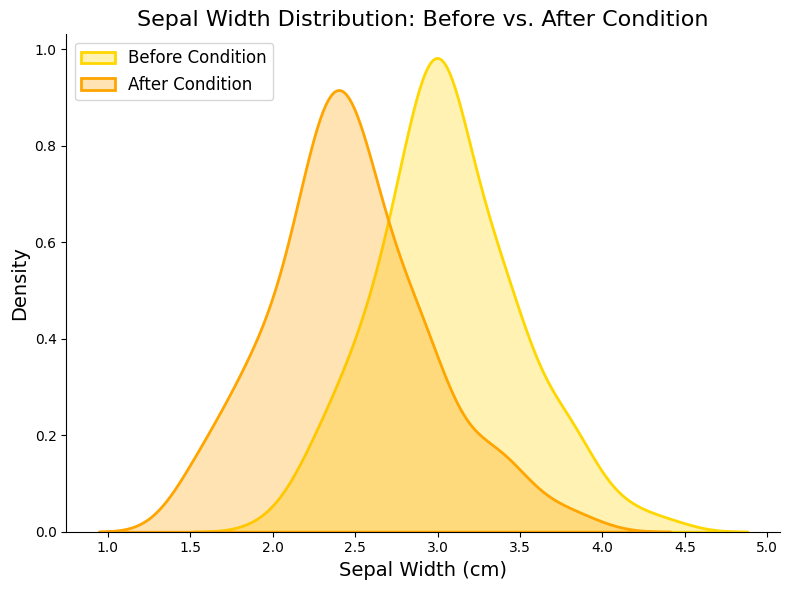

In [ ]:
# Simulate "before condition" and "after condition" data
np.random.seed(42)
before_condition = iris_df['sepal width (cm)']
after_condition = before_condition - np.random.normal(0.6, 0.15, size=len(before_condition))  # Adding noise

# Perform a paired t-test
t_stat, p_value = ttest_rel(before_condition, after_condition)

# Output results
print("Paired T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The sepal widths significantly decreased after the condition change.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in sepal widths before and after the condition change.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))

# Plot before vs. after condition
sns.kdeplot(before_condition, fill=True, alpha=0.3, linewidth=2, label="Before Condition", color="gold")
sns.kdeplot(after_condition, fill=True, alpha=0.3, linewidth=2, label="After Condition", color="orange")

# Customize the plot
plt.title("Sepal Width Distribution: Before vs. After Condition", fontsize=16)
plt.xlabel("Sepal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()



### **Question**  
Did the petal widths of flowers change after a simulated fertilization treatment?

---

### **Paired T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal width before treatment is equal to the average petal width after treatment.  
- **Alternative Hypothesis (\(H_1\))**: The average petal width before treatment is not equal to the average petal width after treatment.  

---

### **Analysis and Interpretation**  
- The KDE plot shows the distribution of petal widths before and after the fertilization treatment. The noticeable shift in the distribution indicates a change in petal widths after the treatment.  
- The t-statistic of \(-18.43\) reflects a large difference between the means of the two related groups relative to the variability in their differences.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Real-World Use Case**  
This paired t-test simulates a practical scenario, such as:
- **Fertilizer Effectiveness**: Evaluating whether a fertilizer increased flower petal widths, indicating improved growth.  
- **Performance Monitoring**: Measuring skill improvement, such as reaction times before and after training.  

Paired t-tests are a powerful tool for measuring changes due to treatments or interventions, especially in controlled experiments.  

---

### **Conclusion**  
The statistical test and visualization strongly indicate that the petal widths significantly changed after the treatment. This demonstrates the effectiveness of paired t-tests in detecting meaningful changes in related measurements.  


Paired T-Test:
T-Statistic: -18.43
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The petal widths significantly changed after the treatment.




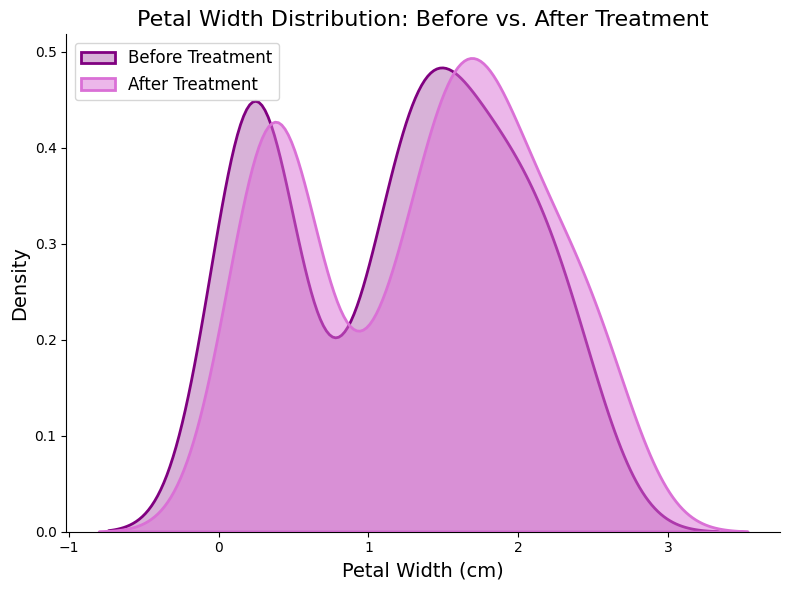

In [ ]:
# Simulate "before treatment" and "after treatment" data
np.random.seed(42)
before_treatment = iris_df['petal width (cm)']
after_treatment = before_treatment + np.random.normal(0.15, 0.1, size=len(before_treatment))  # Adding noise

# Perform a paired t-test
t_stat, p_value = ttest_rel(before_treatment, after_treatment)

# Output results
print("Paired T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The petal widths significantly changed after the treatment.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in petal widths before and after treatment.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))

# Plot before vs. after treatment
sns.kdeplot(before_treatment, fill=True, alpha=0.3, linewidth=2, label="Before Treatment", color="purple")
sns.kdeplot(after_treatment, fill=True, alpha=0.5, linewidth=2, label="After Treatment", color="orchid")

# Customize the plot
plt.title("Petal Width Distribution: Before vs. After Treatment", fontsize=16)
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()
